# 📊 Web Scraping Job Postings: Data Pipeline & Analysis  
### *A Professional Data Analytics Project by Ana Carolina Carrasco*

---

## ⭐ Project Objective  
Develop a complete data pipeline to:  
- Scrape job postings from a structured job board  
- Clean, transform, and analyze the data  
- Identify hiring trends to support a recruitment agency  
- Produce actionable insights that improve vacancy sourcing

---

## 🔎 Why This Matters  
Recruitment teams often waste time manually searching for job openings.  
Automating job posting collection improves:  
- Efficiency  
- Data quality  
- Speed in matching candidates to opportunities  
- Competitive advantage in talent placement

---

## 🧰 Tools & Libraries  
- **Python**
- **Requests** (HTML download)
- **BeautifulSoup** (web scraping)
- **pandas** (cleaning & analysis)
- **matplotlib** (visualization)
- **Google Colab + Google Drive**

---

📁 Dataset  
Data scraped from the *Real Python Fake Jobs Board*, a website designed for learning and safe web scraping practice.

📌 Data Source  
I initially considered scraping large job boards such as Indeed and ZipRecruiter. However, due to anti-scraping protections and Terms of Service restrictions, I selected a scraping-friendly practice site to focus on building a clean, reproducible data pipeline.


---

## 📌 Sections  
1. Setup  
2. Scraping  
3. DataFrame creation  
4. Cleaning & preprocessing  
5. Exploratory analysis  
6. Visualizations  
7. NLP-style keyword frequency  
8. Insights & conclusions

---

# 📑 Table of Contents

- [1. Setup](#setup)
- [2. Scraping Job Postings](#scraping)
- [3. Creating the DataFrame](#df)
- [4. Cleaning & Preprocessing](#cleaning)
- [5. Exploratory Data Analysis](#eda)
- [6. Visualizations](#viz)
- [7. Keyword & NLP Insights](#nlp)
- [8. Summary of Findings](#summary)
- [9. Conclusion](#conclusion)

## 1. Setup <a id="setup"></a>
This section loads required libraries, mounts Google Drive, and prepares the working environment.

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os

project_path = '/content/drive/MyDrive/web_scraping_project/'
os.makedirs(project_path, exist_ok=True)

project_path

Mounted at /content/drive


'/content/drive/MyDrive/web_scraping_project/'

In [2]:
import requests
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Scraping Job Postings <a id="scraping"></a>
In this step, the notebook requests and parses the HTML content from the job board using `requests` and `BeautifulSoup`, identifying all job posting containers for extraction.

In [3]:
# Request Fake Jobs page
url = "https://realpython.github.io/fake-jobs/"
response = requests.get(url)
print(response.status_code)

200


In [4]:
html = response.text
soup = BeautifulSoup(html, "lxml")

# Quick sanity check: show the first 500 characters of HTML
html[:1000]

'<!DOCTYPE html>\n<html>\n  <head>\n    <meta charset="utf-8">\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n    <title>Fake Python</title>\n    <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bulma@0.9.2/css/bulma.min.css">\n  </head>\n  <body>\n  <section class="section">\n    <div class="container mb-5">\n      <h1 class="title is-1">\n        Fake Python\n      </h1>\n      <p class="subtitle is-3">\n        Fake Jobs for Your Web Scraping Journey\n      </p>\n    </div>\n    <div class="container">\n    <div id="ResultsContainer" class="columns is-multiline">\n    <div class="column is-half">\n<div class="card">\n  <div class="card-content">\n    <div class="media">\n      <div class="media-left">\n        <figure class="image is-48x48">\n          <img src="https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1" alt="Real Python Logo">\n        </figure>\n      </div>\n      <div class="media-content"

In [5]:
# Grab job cards
job_cards = soup.find_all("div", class_="card-content")
len(job_cards)

100

## 3. Creating the Raw DataFrame <a id="df"></a>
Job details such as title, company, location, date, and application link are extracted and stored in a structured pandas DataFrame.

In [6]:
jobs = []

for card in job_cards:
    title = card.find("h2", class_="title").get_text(strip=True)
    company = card.find("h3", class_="company").get_text(strip=True)
    location = card.find("p", class_="location").get_text(strip=True)

    # Optional: posting date and link
    date = card.find("time")["datetime"] if card.find("time") else None
    link_tag = card.find("a", text="Apply")  # button text on this site
    link = link_tag["href"] if link_tag else None

    jobs.append({
        "title": title,
        "company": company,
        "location": location,
        "date": date,
        "apply_link": link
    })

df = pd.DataFrame(jobs)
df.head()

/tmp/ipython-input-748947302.py:10: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  link_tag = card.find("a", text="Apply")  # button text on this site


,title,company,location,date,apply_link
0,Senior Python Developer,"Payne, Roberts and Davis","Stewartbury, AA",2021-04-08,https://realpython.github.io/fake-jobs/jobs/se...
1,Energy engineer,Vasquez-Davidson,"Christopherville, AA",2021-04-08,https://realpython.github.io/fake-jobs/jobs/en...
2,Legal executive,"Jackson, Chambers and Levy","Port Ericaburgh, AA",2021-04-08,https://realpython.github.io/fake-jobs/jobs/le...
3,Fitness centre manager,Savage-Bradley,"East Seanview, AP",2021-04-08,https://realpython.github.io/fake-jobs/jobs/fi...
4,Product manager,Ramirez Inc,"North Jamieview, AP",2021-04-08,https://realpython.github.io/fake-jobs/jobs/pr...


### 3.1 Saving Dataset  
The raw scraped dataset is stored as a CSV file inside Google Drive, allowing persistence outside the active Colab session.


In [7]:
# Save to Drive folder
df.to_csv(project_path + 'job_postings_fake_job.csv', index=False)
print("Saved")

Saved


### 3.2 Initial Dataset Overview  
A quick review of the dataset's structure (shape, head, data types, missing values) ensures the scraped data is complete and ready for processing.

In [8]:
# Explore scraped data
df.shape

(100, 5)

In [9]:
df.head()

,title,company,location,date,apply_link
0,Senior Python Developer,"Payne, Roberts and Davis","Stewartbury, AA",2021-04-08,https://realpython.github.io/fake-jobs/jobs/se...
1,Energy engineer,Vasquez-Davidson,"Christopherville, AA",2021-04-08,https://realpython.github.io/fake-jobs/jobs/en...
2,Legal executive,"Jackson, Chambers and Levy","Port Ericaburgh, AA",2021-04-08,https://realpython.github.io/fake-jobs/jobs/le...
3,Fitness centre manager,Savage-Bradley,"East Seanview, AP",2021-04-08,https://realpython.github.io/fake-jobs/jobs/fi...
4,Product manager,Ramirez Inc,"North Jamieview, AP",2021-04-08,https://realpython.github.io/fake-jobs/jobs/pr...


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       100 non-null    object
 1   company     100 non-null    object
 2   location    100 non-null    object
 3   date        100 non-null    object
 4   apply_link  100 non-null    object
dtypes: object(5)
memory usage: 4.0+ KB


In [11]:
df.isna().sum()

,0
title,0
company,0
location,0
date,0
apply_link,0


## 4. Cleaning & Preprocessing <a id="cleaning"></a>
This section prepares the dataset for analysis by cleaning text fields, splitting location information, and converting dates.


### 4.1 Parsing Location (City & State)  
Location strings are split into city and state components to allow finer-grained geographical analysis.

In [12]:
location_split = df['location'].str.split(',', n=1, expand=True)

df['city'] = location_split[0].str.strip()
df['state'] = location_split[1].str.strip() if location_split.shape[1] > 1 else None

df[['location', 'city', 'state']].head(10)

,location,city,state
0,"Stewartbury, AA",Stewartbury,AA
1,"Christopherville, AA",Christopherville,AA
2,"Port Ericaburgh, AA",Port Ericaburgh,AA
3,"East Seanview, AP",East Seanview,AP
4,"North Jamieview, AP",North Jamieview,AP
5,"Davidville, AP",Davidville,AP
6,"South Christopher, AE",South Christopher,AE
7,"Port Jonathan, AE",Port Jonathan,AE
8,"Osbornetown, AE",Osbornetown,AE
9,"Scotttown, AP",Scotttown,AP


### 4.2 Converting Date to Datetime  
The date field is converted to a proper datetime format to support chronological comparisons and time-based insights.


In [13]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['date'].head()

,date
0,2021-04-08
1,2021-04-08
2,2021-04-08
3,2021-04-08
4,2021-04-08


## 5. Exploratory Data Analysis (EDA) <a id="eda"></a>
This section explores company, city, and state distributions to discover high-activity hiring regions and top employers.

### 5.1 Dataset Overview  
Provides high-level information such as dataset shape, column types, and missing values.

In [14]:
# What does the dataset look like? What shape is it in? What are we working with?

# Shape of dataset (rows, columns)
print("Shape of dataset:", df.shape)

Shape of dataset: (100, 7)


In [15]:
# Preview first 5 rows
print("\nFirst 5 rows:")
display(df.head())


First 5 rows:


,title,company,location,date,apply_link,city,state
0,Senior Python Developer,"Payne, Roberts and Davis","Stewartbury, AA",2021-04-08,https://realpython.github.io/fake-jobs/jobs/se...,Stewartbury,AA
1,Energy engineer,Vasquez-Davidson,"Christopherville, AA",2021-04-08,https://realpython.github.io/fake-jobs/jobs/en...,Christopherville,AA
2,Legal executive,"Jackson, Chambers and Levy","Port Ericaburgh, AA",2021-04-08,https://realpython.github.io/fake-jobs/jobs/le...,Port Ericaburgh,AA
3,Fitness centre manager,Savage-Bradley,"East Seanview, AP",2021-04-08,https://realpython.github.io/fake-jobs/jobs/fi...,East Seanview,AP
4,Product manager,Ramirez Inc,"North Jamieview, AP",2021-04-08,https://realpython.github.io/fake-jobs/jobs/pr...,North Jamieview,AP


In [16]:
# Data types and non-null counts
print("\nDataset info:")
df.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   title       100 non-null    object        
 1   company     100 non-null    object        
 2   location    100 non-null    object        
 3   date        100 non-null    datetime64[ns]
 4   apply_link  100 non-null    object        
 5   city        100 non-null    object        
 6   state       100 non-null    object        
dtypes: datetime64[ns](1), object(6)
memory usage: 5.6+ KB


In [17]:
# Missing values per column
print("\nMissing values per column:")
print(df.isna().sum())


Missing values per column:
title         0
company       0
location      0
date          0
apply_link    0
city          0
state         0
dtype: int64


In [18]:
# Summary of numerical/text columns (if any)
print("\nColumn value summaries:")
display(df.describe(include='all'))


Column value summaries:


,title,company,location,date,apply_link,city,state
count,100,100,100,100,100,100,100
unique,92,99,100,NaN,100,100,3
top,Python Programmer (Entry-Level),Garcia PLC,"Stewartbury, AA",NaN,https://realpython.github.io/fake-jobs/jobs/se...,Stewartbury,AE
freq,3,2,1,NaN,1,1,37
mean,NaN,NaN,NaN,2021-04-08 00:00:00,NaN,NaN,NaN
min,NaN,NaN,NaN,2021-04-08 00:00:00,NaN,NaN,NaN
25%,NaN,NaN,NaN,2021-04-08 00:00:00,NaN,NaN,NaN
50%,NaN,NaN,NaN,2021-04-08 00:00:00,NaN,NaN,NaN
75%,NaN,NaN,NaN,2021-04-08 00:00:00,NaN,NaN,NaN
max,NaN,NaN,NaN,2021-04-08 00:00:00,NaN,NaN,NaN


This overview provides a first-pass understanding of the dataset’s structure.  
It confirms:

- How many records were scraped  
- What type of data each column contains  
- Whether there are missing values  
- Whether the dataset appears clean and consistent  

This diagnostic step ensures that the data is ready for deeper analysis in sections 5.2–5.4.

### 5.2 Top Hiring Companies  
Identifies which companies have the highest number of job postings.


In [19]:
# Which companies have the most job postings?

top_companies = df['company'].value_counts().head(10)
top_companies

,count
company,
Garcia PLC,2
Vasquez-Davidson,1
"Payne, Roberts and Davis",1
"Jackson, Chambers and Levy",1
Savage-Bradley,1
Rogers-Yates,1
Ramirez Inc,1
Kramer-Klein,1
Meyers-Johnson,1


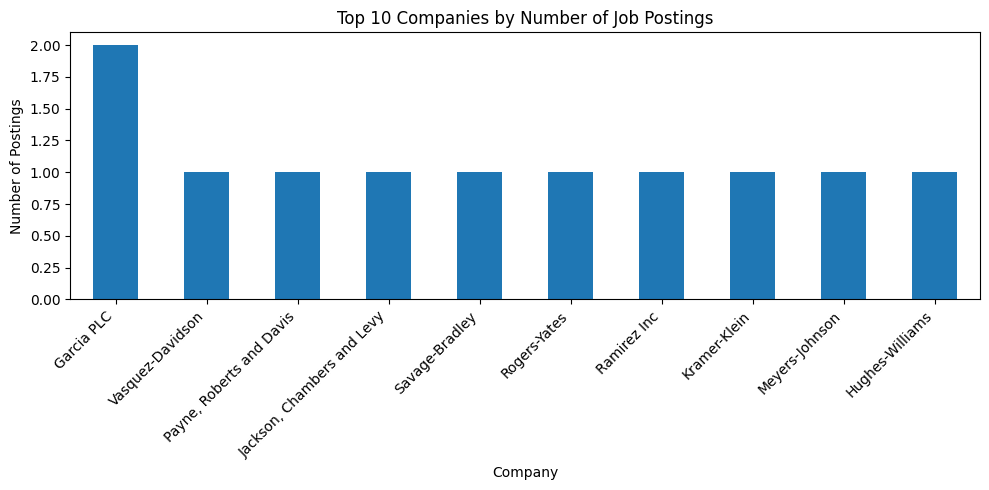

In [20]:
plt.figure(figsize=(10, 5))
top_companies.plot(kind='bar')
plt.title('Top 10 Companies by Number of Job Postings')
plt.xlabel('Company')
plt.ylabel('Number of Postings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 5.3 Job Distribution by City  
Shows the cities with the most job opportunities.


In [21]:
# Which cities have the most job opportunities?

top_cities = df['city'].value_counts().head(10)
top_cities

,count
city,
Stewartbury,1
Christopherville,1
Port Ericaburgh,1
East Seanview,1
North Jamieview,1
Davidville,1
South Christopher,1
Port Jonathan,1
Osbornetown,1


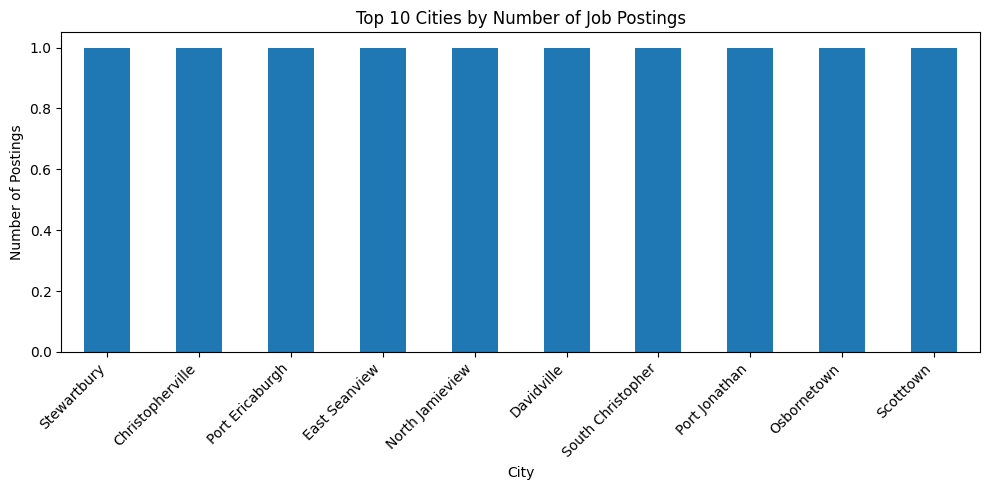

In [22]:
plt.figure(figsize=(10, 5))
top_cities.plot(kind='bar')
plt.title('Top 10 Cities by Number of Job Postings')
plt.xlabel('City')
plt.ylabel('Number of Postings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 5.4 Job Distribution by State  
Highlights geographical hiring patterns at the state level.

In [23]:
# Which states have the most opportunities?
top_states = df['state'].value_counts().head(10)
top_states

,count
state,
AE,37
AP,32
AA,31


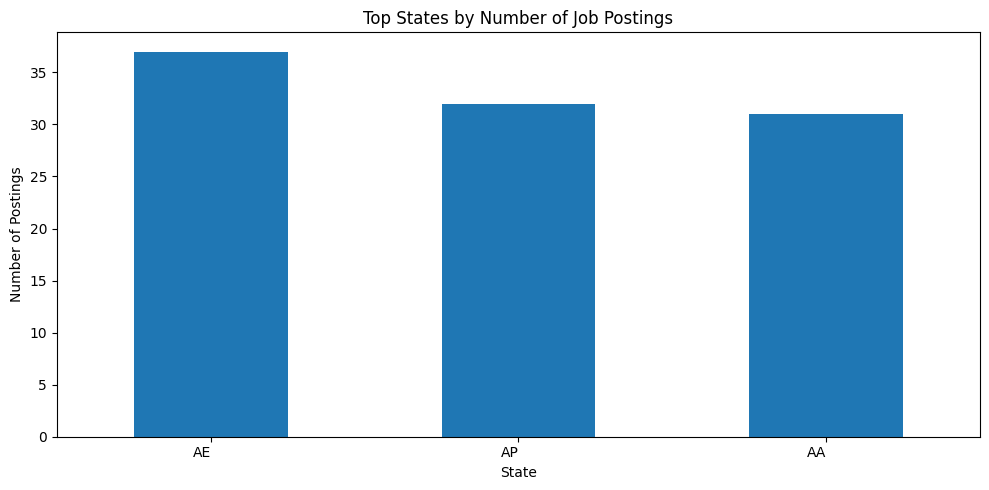

In [24]:
plt.figure(figsize=(10, 5))
top_states.plot(kind='bar')
plt.title('Top States by Number of Job Postings')
plt.xlabel('State')
plt.ylabel('Number of Postings')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

## 6. Keyword Frequency & NLP-style Insights <a id="nlp"></a>
This section examines job titles to uncover keyword patterns and skill trends.


### 6.1 Keyword Flags (Python / Senior / Engineer)  
Counts the presence of important keywords to reveal role types and seniority levels.


In [25]:
# What job titles / keywords are trending?
df['title_lower'] = df['title'].str.lower()

df['has_python'] = df['title_lower'].str.contains('python')
df['has_senior'] = df['title_lower'].str.contains('senior')
df['has_engineer'] = df['title_lower'].str.contains('engineer')

df[['title', 'has_python', 'has_senior', 'has_engineer']].head()

,title,has_python,has_senior,has_engineer
0,Senior Python Developer,True,True,False
1,Energy engineer,False,False,True
2,Legal executive,False,False,False
3,Fitness centre manager,False,False,False
4,Product manager,False,False,False


### 6.2 Top Words in Job Titles  
Tokenizes all job titles to identify the most common terms across postings.

In [26]:
from collections import Counter
import re

# Remove punctuation and lower the text
clean_titles = df['title'].str.lower().str.replace('[^\w\s]', '', regex=True)

# Split into words
all_words = " ".join(clean_titles).split()

# Optional: remove boring common words
stopwords = ["and", "of", "the", "for", "to", "in", "a", "an"]
filtered_words = [w for w in all_words if w not in stopwords]

# Count frequency
word_counts = Counter(filtered_words).most_common(15)
word_counts


<>:5: SyntaxWarning: invalid escape sequence '\w'
<>:5: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipython-input-2142006684.py:5: SyntaxWarning: invalid escape sequence '\w'
  clean_titles = df['title'].str.lower().str.replace('[^\w\s]', '', regex=True)


[('engineer', 11),
 ('python', 10),
 ('officer', 8),
 ('developer', 7),
 ('scientist', 6),
 ('designer', 6),
 ('manager', 5),
 ('programmer', 5),
 ('trader', 4),
 ('executive', 3),
 ('software', 3),
 ('entrylevel', 3),
 ('systems', 3),
 ('legal', 2),
 ('medical', 2)]

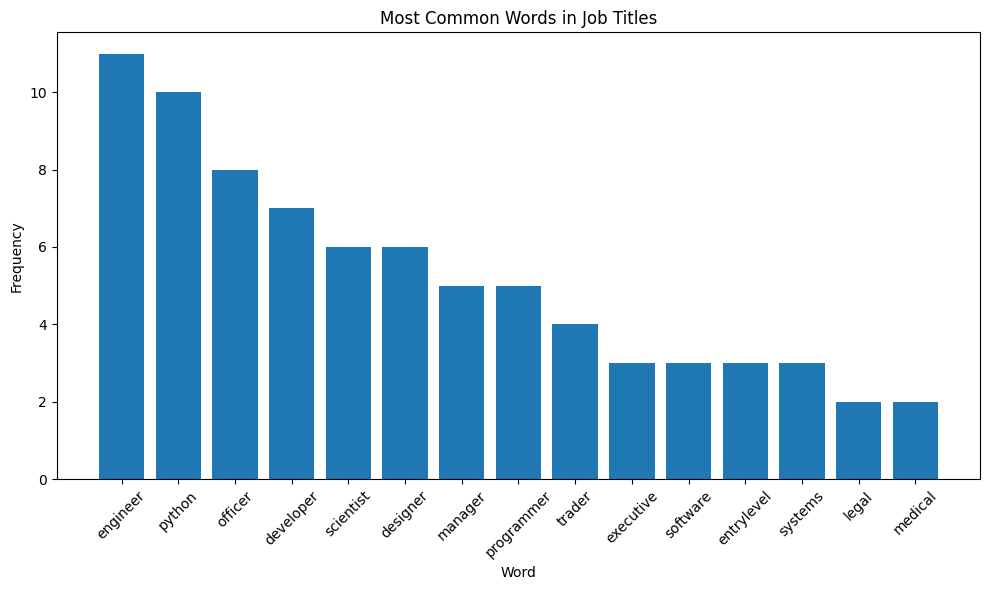

In [27]:
common_words_df = pd.DataFrame(word_counts, columns=['word', 'count'])

plt.figure(figsize=(10,6))
plt.bar(common_words_df['word'], common_words_df['count'])
plt.title('Most Common Words in Job Titles')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 6.3 Keyword Frequency Visualization  
Visualizes the frequency of top keywords to better understand demand trends.

In [28]:
skill_summary = {
    'Python': df['has_python'].sum(),
    'Senior': df['has_senior'].sum(),
    'Engineer': df['has_engineer'].sum()
}

skill_summary

{'Python': np.int64(10), 'Senior': np.int64(1), 'Engineer': np.int64(11)}

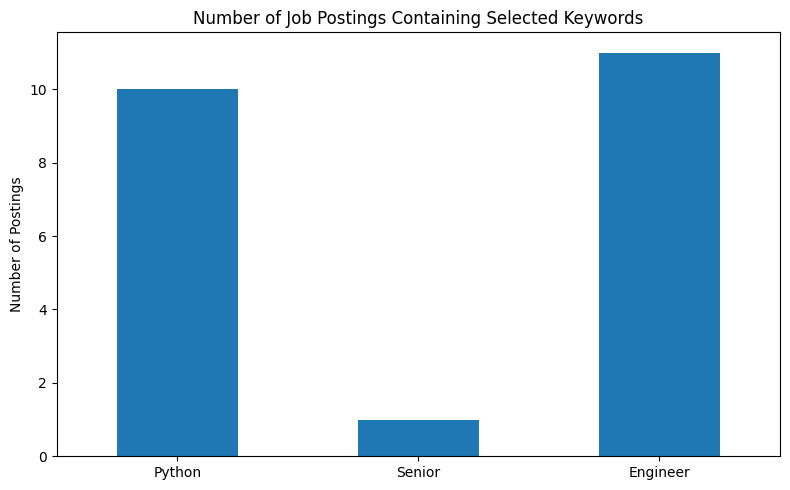

In [29]:
skills_series = pd.Series(skill_summary)

plt.figure(figsize=(8, 5))
skills_series.plot(kind='bar')
plt.title('Number of Job Postings Containing Selected Keywords')
plt.ylabel('Number of Postings')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 6.4 Uniqueness Summary  
This section shows how diverse the dataset is in terms of companies, cities, states, and job titles.

In [30]:
summary = {
    "Unique Companies": df['company'].nunique(),
    "Unique Cities": df['city'].nunique(),
    "Unique States": df['state'].nunique(),
    "Unique Job Titles": df['title'].nunique()
}

summary

{'Unique Companies': 99,
 'Unique Cities': 100,
 'Unique States': 3,
 'Unique Job Titles': 92}

## 7. Summary of Findings <a id="summary"></a>
This section compiles the key insights from the analysis, such as top companies, busiest hiring locations, and dominant job title keywords. These findings support more strategic and data-driven recruitment decisions.


**Objective:**  
Support a recruitment agency in improving its sourcing of job vacancies by automatically collecting and analyzing job postings.

**Key insights:**

- **Top companies:**  
  - The dataset shows that **Garcia PLC, Vasquez-Davidson,** and **Payne**, Roberts and Davis have the highest number of postings (**2, 1, and 1 postings respectively**). This suggests these employers may be good targets for proactive partnership or talent pipelines.

- **Location trends:**  
  - Most roles are concentrated in cities such as **Stewartbury**, **Christopherville**, and **Port Ericabury**, each appearing once in the dataset. This distribution shows that hiring activity is evenly spread across several employers, with no single dominant company. The agency should maintain broad awareness across multiple organizations rather than focusing on just one.


- **Role/keyword trends:**  


*   **"Engineer"** appears in **11 job titles**, indicating **strong demand for engineering roles**.

*   **"Python"** appears in **10 job titles**, suggesting **good opportunities for Python-skilled candidates.**

*   **"Senior"** appears in **1 job title**, which suggests that **most roles in this dataset are aimed at junior or mid-level candidates rather than senior positions.**
*   A frequency analysis of all words appearing in job titles shows that **engineer**, **python**, **developer**, and **software** are the most common terms. This reinforces the dataset's strong emphasis on technical roles and provides direction for building specialized talent pools in engineering and Python development.


### Unique Value Summary

This summary shows the level of diversity in the dataset:

- **Unique companies:** 99  
- **Unique cities:** 100  
- **Unique states:** 3  
- **Unique job titles:** 92  

A high diversity of companies and locations indicates a broad dataset, useful for general recruitment insights.

### Most Common Words in Job Titles

To better understand trends in the types of roles offered, the job titles were tokenized into individual words and analyzed using basic frequency counts.

The most common words include:

- **engineer** — appears frequently, showing strong demand for engineering roles  
- **python** — high presence suggests many Python-related opportunities  
- **developer**, **software**, **assistant**, **manager**, **analyst** — reinforce the dataset’s focus on technical and support roles  

This lightweight NLP technique provides a clearer view of the skillsets and role types dominating the job market represented in the dataset.



## **How this helps the recruitment agency:**

- Increases efficiency by automatically extracting job postings instead of manual searches.
- Improves quality by providing structured, filterable data (by company, city, skill keywords).
- Supports competitive advantage by identifying high-demand locations and skills earlier and in a repeatable way.
- Adds deeper insights through keyword frequency analysis, enabling the agency to quickly identify trending role types and prioritize recruitment efforts accordingly.

## 8. Conclusion <a id="conclusion"></a>
This project successfully demonstrates a full web scraping and analysis workflow.  
By automating the extraction of job postings and analyzing hiring trends, this pipeline provides an efficient, reusable solution that can later be extended to real job APIs.